# Multiple Linear Regression

## Importing the libraries

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [25]:
dataset=pd.read_csv('50_Startups.csv')

In [114]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


lets do some basic check

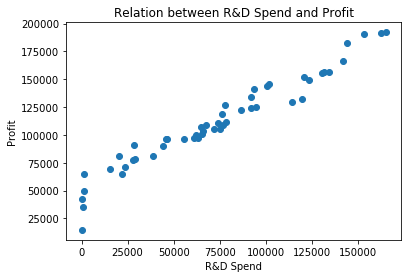

In [121]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'])
plt.title('Relation between R&D Spend and Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

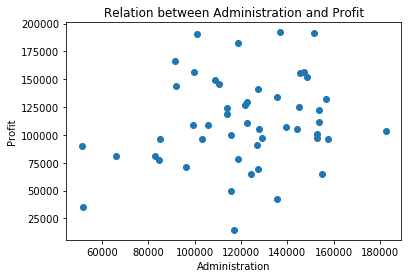

In [122]:
plt.scatter(dataset['Administration'],dataset['Profit'])
plt.title('Relation between Administration and Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

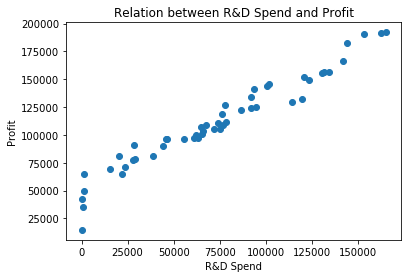

In [123]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'])
plt.title('Relation between R&D Spend and Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

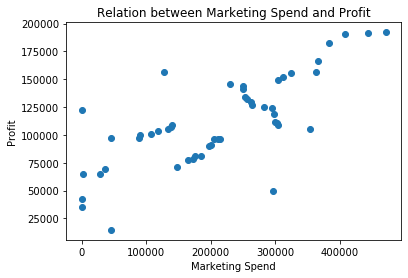

In [124]:
plt.scatter(dataset['Marketing Spend'],dataset['Profit'])
plt.title('Relation between Marketing Spend and Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

Check the correlation now

In [27]:
d_corr=dataset[['R&D Spend','Administration','Marketing Spend']]

In [28]:
d_corr.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [29]:
d_corr.corr()

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.241955,0.724248
Administration,0.241955,1.000000,-0.032154
Marketing Spend,0.724248,-0.032154,1.000000


In [32]:
X = dataset.iloc[:, :-1].values
print(X)
y = dataset.iloc[:, -1].values
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [35]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

## Splitting the dataset into the Training set and Test set

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 6)
(10, 6)
(40,)
(10,)


## Training the Multiple Linear Regression model on the Training set

In [94]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=regressor.predict(X_test)

## Predicting the Test set results

In [107]:
y_test=pd.DataFrame(y_test)
y_test.rename(columns={0:'y_test'},inplace=True)

In [108]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={0:'y_pred'},inplace=True)

In [125]:
result=pd.concat([y_test,y_pred],axis=1)
result['diff']=result['y_test']-result['y_pred']
result

,y_test,y_pred,diff
0,141585.52,130810.785399,10774.734601
1,132602.65,151612.820418,-19010.170418
2,166187.94,175383.554979,-9195.614979
3,152211.77,151500.087145,711.682855
4,64926.08,44652.998677,20273.081323
5,191792.06,190991.798198,800.261802
6,107404.34,101755.796372,5648.543628
7,108552.04,112546.665639,-3994.625639
8,42559.73,44413.646610,-1853.916610
9,108733.99,111167.766415,-2433.776415
